# 1.导入数据


In [63]:
import matplotlib.pyplot as plt
plt.rc('font',**{'family':"Microsoft YaHei, SimHei"})
import pandas as pd
data = pd.read_table('C:/Users/cloud/Desktop/log.txt',names=['id','api','count','res_time_sum','res_time_min','res_time_max','res_time_avg','interval','created_at'])
data.tail()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
179491,13438800,/front-api/bill/create,11,2783.48,99.24,489.90,253.0,60,2018-05-30 23:06:21
179492,13438866,/front-api/bill/create,10,1951.10,85.37,529.51,195.0,60,2018-05-30 23:07:21
179493,13438917,/front-api/bill/create,3,494.17,103.95,211.47,164.0,60,2018-05-30 23:08:21
179494,13438981,/front-api/bill/create,9,1798.28,101.11,433.30,199.0,60,2018-05-30 23:09:21
179495,13439086,/front-api/bill/create,6,1017.97,74.45,298.97,169.0,60,2018-05-30 23:10:21


# 2.异常值-箱线图

通过箱线图可以看出各个参数都一些异常值。

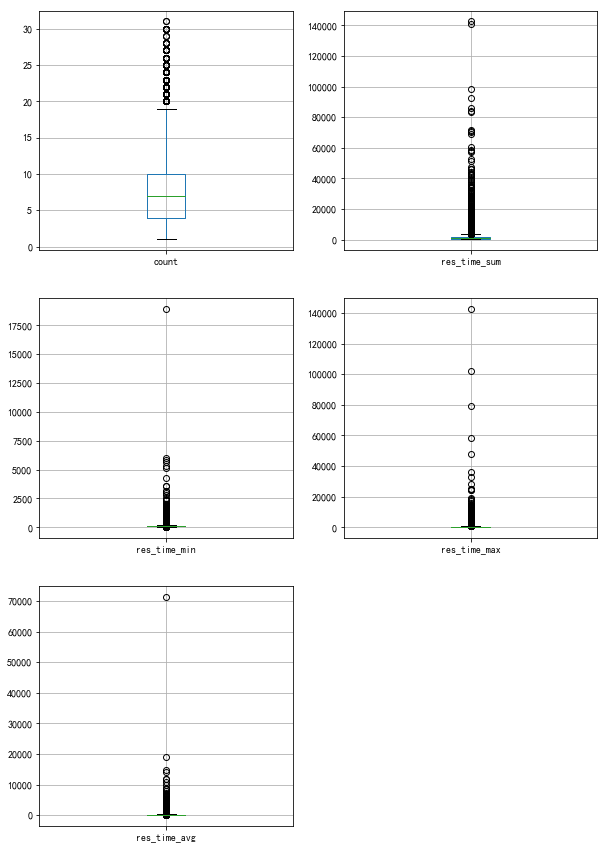

In [86]:
import matplotlib.pyplot as plt
# 访问次数-箱线图
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
data[['count']].boxplot()
plt.subplot(3,2,2)
data[['res_time_sum']].boxplot()
plt.subplot(3,2,3)
data[['res_time_min']].boxplot()
plt.subplot(3,2,4)
data[['res_time_max']].boxplot()
plt.subplot(3,2,5)
data[['res_time_avg']].boxplot()
plt.show()

# 3.重复值-duplicated

In [5]:
data.duplicated().sum()

0

# 3.以时间为索引的数据data2

In [48]:
s = pd.to_datetime(data.created_at)
data2 = data.set_index(s)
data2 = data2.drop('created_at',axis=1)
data2.tail()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval
created_at,,,,,,,,
2018-05-30 23:06:21,13438800,/front-api/bill/create,11,2783.48,99.24,489.90,253.0,60
2018-05-30 23:07:21,13438866,/front-api/bill/create,10,1951.10,85.37,529.51,195.0,60
2018-05-30 23:08:21,13438917,/front-api/bill/create,3,494.17,103.95,211.47,164.0,60
2018-05-30 23:09:21,13438981,/front-api/bill/create,9,1798.28,101.11,433.30,199.0,60
2018-05-30 23:10:21,13439086,/front-api/bill/create,6,1017.97,74.45,298.97,169.0,60


## 4.api和interval 都是常量，对数据分析用处不大，可以丢弃。

# 去除掉api和interval的数据data3

In [15]:
data3 = data2.drop(['api','interval'],axis=1)
data3.head()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg
created_at,,,,,,
2017-11-01 00:00:07,162542,8,1057.31,88.75,177.72,132.0
2017-11-01 00:01:07,162644,5,749.12,103.79,240.38,149.0
2017-11-01 00:02:07,162742,5,845.84,136.31,225.73,169.0
2017-11-01 00:03:07,162808,9,1305.52,90.12,196.61,145.0
2017-11-01 00:04:07,162943,3,568.89,138.45,232.02,189.0


In [62]:
data4 = data3.groupby(data3.index.hour).mean()
data4

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg
created_at,,,,,,
0,6.856837e+06,3.304614,639.268466,131.116595,276.765055,188.529991
1,6.880160e+06,1.690119,299.231564,153.462484,202.914776,175.489486
2,6.770700e+06,1.162311,204.817215,173.097662,184.628900,178.325997
3,6.986980e+06,1.077253,182.886180,172.186867,175.539099,173.283262
4,7.179317e+06,1.137931,166.429655,145.244138,154.626207,149.396552
5,9.130307e+06,1.160000,196.267200,171.603200,183.040400,176.840000
6,1.082598e+07,1.000000,182.925625,182.925625,182.925625,182.562500
7,1.048131e+07,1.000000,237.177500,237.177500,237.177500,236.800000
8,9.563027e+06,1.027027,194.346486,192.069189,192.911622,191.972973


# 5.分析API调用情况

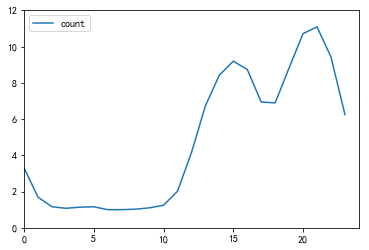

<Figure size 1440x1440 with 0 Axes>

In [60]:
plt.plot(data4.index,data4['count'])
plt.axis([0,24,0,12])
plt.xlabel('')
plt.legend()
plt.figure(figsize=(20,20))
plt.show()

# 6.分析API调用时间

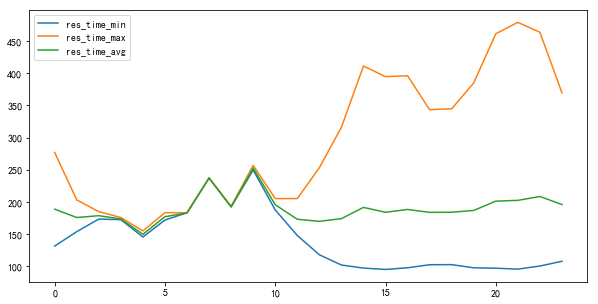

In [33]:
plt.figure(figsize=(10,5))
plt.plot(data4.index,data4['res_time_min'],label='res_time_min')
plt.plot(data4.index,data4['res_time_max'],label='res_time_max')
plt.plot(data4.index,data4['res_time_avg'],label='res_time_avg')
plt.legend()
plt.show()

# 7.分析几天的API调用次数

In [64]:
data5 = data3['2017-12-31':'2018-1-15']
data5.head()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg
created_at,,,,,,
2017-12-31 00:00:54,4274558,5,546.06,81.45,134.34,109.0
2017-12-31 00:01:54,4274644,6,1038.00,114.51,297.18,173.0
2017-12-31 00:02:54,4274726,4,826.65,158.55,316.64,206.0
2017-12-31 00:03:54,4274813,4,806.36,108.46,317.82,201.0
2017-12-31 00:04:54,4274854,6,1093.34,86.38,239.70,182.0


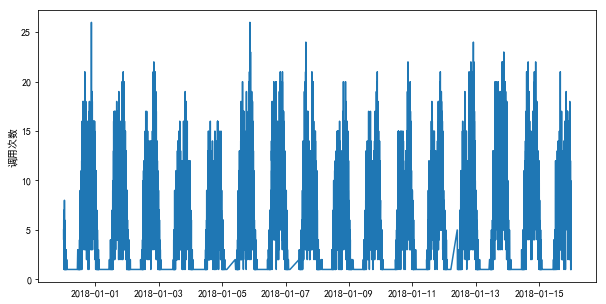

In [67]:
plt.figure(figsize=(10,5))
plt.plot(data5.index,data5['count'])
plt.ylabel('调用次数')
plt.show()

# 8.分析周末和平时的调用情况

In [73]:
weekend = (data3.index.weekday==5)|(data3.index.weekday==6)
data6 = data3[weekend]
data7 = data3[~(weekend)]
data6 = data6.groupby(data6.index.hour).mean()
data7 = data7.groupby(data7.index.hour).mean()

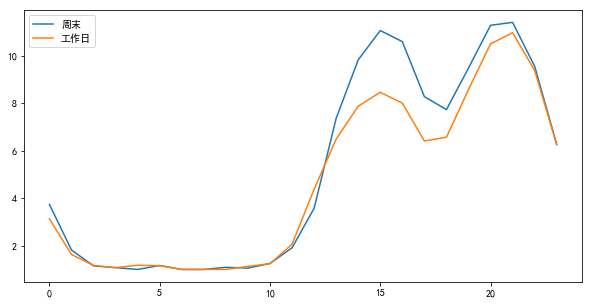

In [74]:
plt.figure(figsize=(10,5))
plt.plot(data6.index, data6['count'],label='周末')
plt.plot(data7.index, data7['count'],label='工作日')
plt.legend()
plt.show()